In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        token = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[token] = vector

In [3]:
def find_closest_embeddings(embedding, cutoff=25):
    return sorted(embeddings_dict.keys(), key=lambda token: spatial.distance.euclidean(embeddings_dict[token], embedding))

In [4]:
print(find_closest_embeddings(embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"])[:5])

['fingernails', 'toenails', 'stringy', 'peeling', 'shove']


In [9]:
tsne = TSNE(n_components=2, random_state=0)

tokens = list(embeddings_dict.keys())
vectors = [embeddings_dict[token] for token in tokens]

Y = tsne.fit_transform(vectors[:50])

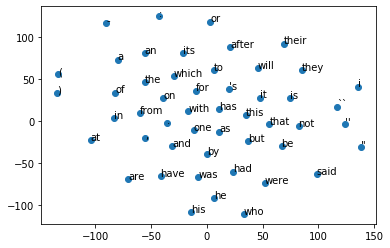

In [10]:
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(tokens, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

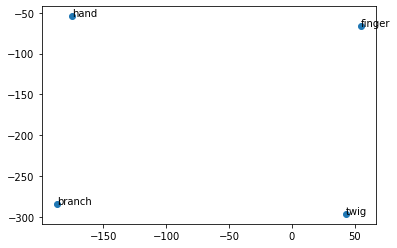

In [11]:
tsne = TSNE(n_components=2, random_state=0)

tokens = ["branch", "twig", "finger", "hand"]
vectors = [embeddings_dict[token] for token in tokens]

Y = tsne.fit_transform(vectors[:1000])

plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(tokens, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()